# AB Test Simulation in Python

## Overview of Tasks in This Notebook

- Simulate 10,000 users randomly assigned to treatment/control
- Conversion rate in treatment group increased by 2 percentage points
- Conduct z-test for difference in proportions

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [2]:
#Simulate dataset

#Set seed
np.random.seed(101)

#10000 users
n = 10000

#Conversion rate for control group = 10%
#Conversion rate for treatment group = 12%
base_conversion = 0.10
lift = 0.02
treatment_conversion = base_conversion + lift

In [3]:
#Randomly assign users to control or treatment groups (equal chance)
group = np.random.choice(['control', 'treatment'], size = n)

In [4]:
#Simulate conversion (True/False) using list comprehension
converted = [
    np.random.rand() < base_conversion if g == 'control'
    else np.random.rand() < treatment_conversion
    for g in group
]

In [5]:
#Check the distribution of treatment vs control in the simulated data
#pd.Series(group).value_counts().plot(kind = 'bar')

In [6]:
#Check the distribution of treatment vs control in the simulated data
#pd.Series(converted).value_counts().plot(kind = 'bar')

In [7]:
#Add a column called 'channel' to indicate which communication method was used for marketing
#I will use this for subgroup analyses in the future
channel = np.random.choice(['email', 'social', 'search'], size = n)

In [8]:
#pd.Series(channel).value_counts().plot(kind = 'bar')

In [9]:
#Combine the arrays and make the result into a DataFrame using a dictionary
df = pd.DataFrame({
    'user_id': range(1, n+1),
    'group': group,
    'converted': converted,
    'channel': channel
})

In [10]:
#Save df permanently
df.to_csv('../data/ab_data.csv', index=False)

In [11]:
df.head()

,user_id,group,converted,channel
0,1,treatment,False,social
1,2,treatment,True,social
2,3,treatment,False,email
3,4,control,True,social
4,5,treatment,False,search


In [12]:
#Calculate conversion rates by treatment vs control
#Save the result in an object dfsummary
dfsummary = df.groupby('group')['converted'].agg(['sum', 'count'])
dfsummary['rate'] = dfsummary['sum']/dfsummary['count']
print(dfsummary)

           sum  count      rate
group                          
control    477   4924  0.096872
treatment  611   5076  0.120370


In [13]:
#Run z-test for difference in proportions
z_stat, p_val = proportions_ztest(count = dfsummary['sum'], nobs = dfsummary['count'])

#Print z-score
print(f"\nZ-statistic: {z_stat: .3f}")

#Print corresponding p-value
print(f"P-value: {p_val: .4f}")


Z-statistic: -3.773
P-value:  0.0002


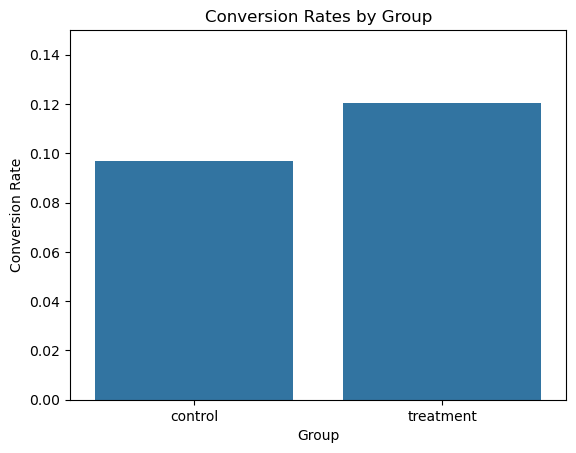

In [14]:
#Plot conversion rates
sns.barplot(x = dfsummary.index, y = dfsummary['rate'].values)
plt.title('Conversion Rates by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.15)
plt.show()

In [15]:
dfsummary

,sum,count,rate
group,,,
control,477,4924,0.096872
treatment,611,5076,0.120370


## Conclusion
- The simulated A/B test compared conversion rates between control and treatment groups.
- The treatment group had a conversion rate of **12.0%**, compared to **9.7%** in the control group.
- A z-test for proportions yielded a p-value of **0.0002**, indicating a statistically significant increase at the significance level of 0.05.
- This suggests that the treatment had a **positive and statistically significant effect** on the conversion rate.
- Additional subgroup or logistic regression analysis could be explored in future iterations.

## Recommendation
- Based on the results of the experiment, I suggest considering the use of the new marketing campaign if:
    - the goal of this new marketing campaign is to increase the conversion rate, and
    - the increase of approximately 2% is worth any potential increased cost